# Probability

Branch of mathematics that allows us to quantify uncertainty

# Set Theory

A set is a collection of things with the following characteristics:
* Each element in a set is distinct
* The elements in a set are in no particular order

A = {1, 2, 3, 4, 5} = {1, 5, 2, 4, 3}

# Experiments and Sample Spaces

In probability, an experiment is something that produces observation(s) with some 
level of uncertainty. A sample point is a single possible outcome of an experiment. 
Finally, a sample space is the set of all possible sample points for an experiment.

Example of a sample space for tossing two coins (Heads or Tails):

S = {HH, HT, TH, TT}

To calculate the estimated probability (P) of any outcome, we can use the 
following formula:

<br>$ P(Event) = \frac{Number Of Times The Event oOccurred}{Total Number Of Trials} $

# Law of Large Numbers

We can’t repeat our random experiment an infinite amount of times (as much FUN as that would be!). 
However, we can still flip both coins a large number of times. As we flip both coins more and more,
the observed proportion of times each event occurs will converge to its true probability. 
This is called the law of large numbers.

In [3]:
import numpy as np

def coin_flip_experiment():
    coin_result_one = ['Heads', 'Tail']
    coin_result_two = ['Heads', 'Tail']
    result_one = np.random.choice(coin_result_one)
    result_two = np.random.choice(coin_result_two)
    return result_one, result_two

trials = (10, 100, 1_000, 10_000, 100_000)
for trial in trials:
    event_hh = 0
    for _ in range (trial):
        if coin_flip_experiment() == ('Heads', 'Heads'):
            event_hh += 1
    print("Number of trials:", trial)
    print("P(H,H) =", round(event_hh/trial, 2))

Number of trials: 10
P(H,H) = 0.1
Number of trials: 100
P(H,H) = 0.28
Number of trials: 1000
P(H,H) = 0.24
Number of trials: 10000
P(H,H) = 0.25
Number of trials: 100000
P(H,H) = 0.25


# Rules of Probability

## Union, Intersection, and Complement

### Union

$ A \cup B $ (all elements that are in A OR B)

### Intersection

$ A \cap B $ (all elements that are in A AND B)

### Complement

$ A^c = U - A $ (all elements of a universal set U that are not in A)

## Independence and Dependence

### Independence
 
The fact that previous coin flips do not affect future ones is called independence. 
Two events are independent if the occurrence of one event does not affect the probability 
of the other.

### Dependence

Suppose we have a bag of five marbles: two marbles are blue and three marbles are red. 
If we take one marble out of the bag, what is the probability that the second marble we 
take out is blue? This describes two events that are dependent. The probability of grabbing 
a blue marble in the second event depends on whether we take out a red or a blue marble in the
first event.

## Mutually Exclusive Events

Two events are considered mutually exclusive if they cannot occur at the same time. 
For example, consider a single coin flip: the events “tails” and “heads” are mutually exclusive 
because we cannot get both tails and heads on a single flip. (their intersection is an empty set)

## Addition Rule

The addition rule describes the probability one event OR another event (or both) occurring. 

$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $

## Conditional Probability

In short, conditional probability measures the probability of one event occurring, 
given that another one has already occurred. Notationally, we denote the word “given” 
with a vertical line. For example, if we want to represent the probability that we 
choose a red marble given the first marble is blue, we can write:

P(Red Second | Blue First)

For INDEPENDENT events, we can say the following:

P(A | B) = P(A) and P(B | A) = P(B)

## Multiplication Rule

What if we want to calculate the probability that two events happen simultaneously? 
For two events, A and B, this is $ P(A \cap B) $ or the probability of the intersection 
of A and B.

The general formula for the probability of DEPENDENT events is:

$ P(A \cap B) = P(A) * P(B|A) $

The formula for the probability of INDEPENDENT events is:

$ P(A \cap B) = P(A) * P(B) $

## Bayes` Theorem

Absolutely! To explain how to calculate the probability of two conditional events using Bayes' 
Theorem, let's first define the parts of the formula and then walk through an example.

Bayes' Theorem formula looks like this:

$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $
 

Here's what each part means:
* P(A∣B): Probability of Event A happening given that Event B has happened.
* P(B∣A): Probability of Event B happening given that Event A has happened.
* P(A): The initial probability of Event A happening.
* P(B): The initial probability of Event B happening.

# Random Variables

A random variable is, in its simplest form, a function. In probability, we often use random
variables to represent random events. For example, we could use a random variable to represent 
the outcome of a die roll: any number between one and six.

In [5]:
import numpy as np

# Simulate a six-sided die
die = range (1, 7) 

# Simulate rolling a fair die twice
result = np.random.choice(die, 2, replace=True)
print(result)

[6 3]


## Discrete Random Variables

Random variables with a countable number of possible values are called discrete random variables.
For example, rolling a regular 6-sided die would be considered a discrete random variable 
because the outcome options are limited to the numbers on the die.

## Continuous Random Variables

When the possible values of a random variable are uncountable, it is called a continuous random
variable. These are generally measurement variables and are uncountable because measurements can
always be more precise – meters, centimeters, millimeters, etc.

## Probability Mass Functions (PMF)

A probability mass function (PMF) is a type of probability distribution that defines the 
probability of observing a particular value of a discrete random variable. For example, 
a PMF can be used to calculate the probability of rolling a three on a fair six-sided die.

For example, suppose that we flip a fair coin some number of times and count the number of heads.
The probability mass function that describes the likelihood of each possible outcome 
(eg., 0 heads, 1 head, 2 heads, etc.) is called the binomial distribution. The parameters for the
binomial distribution are:
* n for the number of trials (eg., n=10 if we flip a coin 10 times)
* p for the probability of success in each trial (probability of observing a particular outcome in each trial. In this example, p= 0.5 because the probability of observing heads on a fair coin flip is 0.5)

If we flip a fair coin 10 times, we say that the number of observed heads follows a 
Binomial(n=10, p=0.5) distribution. The graph below shows the probability mass function for 
this experiment. The heights of the bars represent the probability of observing each 
possible outcome as calculated by the PMF.

![Binomial Distribution](binomial-distribution.png)

In [1]:
import scipy.stats as stats

trials = 10
for success in range(0, 11):
    success_rate = stats.binom.pmf(success, trials, 0.5)
    print(f"x={str(success).rjust(2, ' ')}\t", f"Success rate={round(success_rate, 2)}")

x= 0	 Success rate=0.0
x= 1	 Success rate=0.01
x= 2	 Success rate=0.04
x= 3	 Success rate=0.12
x= 4	 Success rate=0.21
x= 5	 Success rate=0.25
x= 6	 Success rate=0.21
x= 7	 Success rate=0.12
x= 8	 Success rate=0.04
x= 9	 Success rate=0.01
x=10	 Success rate=0.0


In [18]:
import scipy.stats as stats

def calculate_pmf_over_range(trials, p_success, range):
    success_rate = 0.0
    for r in range:
        rate = stats.binom.pmf(r, trials, p_success)
        success_rate += rate
    return success_rate

print(str(round(calculate_pmf_over_range(10, 0.5, range(4,7)), 2)))
print(str(round(calculate_pmf_over_range(10, 0.5, range(5,6)), 2)))

0.66
0.25


## Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) for a discrete random variable can be derived 
from the PMF. However, instead of the probability of observing a specific value, the 
cumulative distribution function gives the probability of observing a specific value OR LESS.

As previously discussed, the probabilities for all possible values in a given probability
distribution add up to 1. The value of a cumulative distribution function at a given value 
is equal to the sum of the probabilities lower than it, with a value of 1 for the largest
possible number.

If $ x_1 < x_2 \Rightarrow CDF(x_1) < CDF(x_2) $  

We can use the CDF to easily calculate the probability of a specific range:

<br>$ P(3<=x<=6) = P(x<=6) - P(x<=2) $

In [5]:
import scipy.stats as stats

def calculate_cumulative_distribution(trials, p_success, value):
    return stats.binom.cdf(value, trials, p_success)

for i in range(0,11):
    print(str(i).rjust(2, ' ') + ":", round(calculate_cumulative_distribution(10, 0.5, i),2))    

 0: 0.0
 1: 0.01
 2: 0.05
 3: 0.17
 4: 0.38
 5: 0.62
 6: 0.83
 7: 0.95
 8: 0.99
 9: 1.0
10: 1.0


## Probability Density Functions (PDF)

Similar to how discrete random variables relate to PMFs, continuous random variables relate to
Probability Density Functions (PDF). They define the probability distributions of continuous
random variables and span across all possible values that the given random variable can take on.

When graphed, a PDF is a curve across all possible values the random variable can take on, 
and the total area under this curve adds up to 1. In a PDF, we cannot calculate the probability 
at a single point. This is because the area of the curve underneath a single point is always zero.

We can calculate the area under the curve using the CDF for the given probability distribution.

We know that women’s heights have a mean of 167.64 cm with a standard deviation of 8 cm, which 
makes them fall under the Normal (167.64, 8) distribution. Let’s say we want to know the 
probability that a randomly chosen woman is less than 158 cm tall.
We can use the cumulative distribution function to calculate the area under the probability
density function curve from 0 to 158 to find that probability.

![Probability Density Function](pdf.png)

In [7]:
import scipy.stats as stats

# BE CAREFUL TO USE 'STATS.NORM.CDF' NOT 'STATS.BINOM.CDF'!!!
area = stats.norm.cdf(158, 167.64, 8)
print(round(area, 2))

0.11


We can take the difference between two overlapping ranges to calculate the probability that 
a random selection will be within a range of values for continuous distributions. This is 
essentially the same process as calculating the probability of a range of values for discrete
distributions.

In [10]:
import scipy.stats as stats

women_till_175 = stats.norm.cdf(175, 167.64, 8)
women_till_165 = stats.norm.cdf(165, 167.64, 8)
women_165_175 = women_till_175 - women_till_165
women_larger_175 = 1 - women_till_175


print("Women <= 175:", round(women_till_175, 2))
print("Women <= 165:", round(women_till_165, 2))
print("Women between 165 and 175: ", round(women_165_175, 2))
print("Women > 175:", round(women_larger_175, 2))

Women <= 175: 0.82
Women <= 165: 0.37
Women between 165 and 175:  0.45
Women > 175: 0.18


# Poisson Distribution

The Poisson distribution is another common distribution, and it is used to describe the number of 
times a certain event occurs within a fixed time or space interval. For example, the Poisson 
distribution can be used to describe the number of cars that pass through a specific intersection 
between 4pm and 5pm on a given day. It can also be used to describe the number of calls received 
in an office between 1pm to 3pm on a certain day.

The Poisson distribution is defined by the rate parameter, symbolized by the Greek letter lambda, 
λ. Lambda represents the expected value — or the average value — of the distribution. For example, 
if our expected number of customers between 1pm and 2pm is 7, then we would set the parameter for 
the Poisson distribution to be 7. The PMF for the Poisson(7) distribution is as follows:

![Poisson Distribution](poisson-distribution.png)

When we talk about the expected value, we mean the average over many observations. This relates to 
the Law of Large Numbers: the more samples we have, the more likely samples will resemble the true 
population, and the mean of the samples will approach the expected value.

We can use the poisson.pmf() method in the scipy.stats library to evaluate the probability of 
observing a specific number given the parameter (expected value) of a distribution. For example, 
suppose that we expect it to rain 10 times in the next 30 days. The number of times it rains in 
the next 30 days is “Poisson distributed” with lambda = 10. We can calculate the probability of 
exactly 6 times of rain as follows:

In [24]:
import scipy.stats as stats

sum = 0.0
for i in range(0,26):
    # DON'T CONFUSE 'STATS.POISSON' WITH 'STATS.BINOM'
    probability = stats.poisson.pmf(i, 10) * 100
    sum += probability
    print(str(i).rjust(2, " "), "times", str(round(probability, 2)).rjust(5, " "), "%")
print("Sum\t\t", round(sum, 2))

cumulative_probability = 0.0
for i in range(9,12):
    cumulative_probability += stats.poisson.pmf(i, 10)
print("P(9-11)\t", round(cumulative_probability, 2))

 0 times   0.0 %
 1 times  0.05 %
 2 times  0.23 %
 3 times  0.76 %
 4 times  1.89 %
 5 times  3.78 %
 6 times  6.31 %
 7 times  9.01 %
 8 times 11.26 %
 9 times 12.51 %
10 times 12.51 %
11 times 11.37 %
12 times  9.48 %
13 times  7.29 %
14 times  5.21 %
15 times  3.47 %
16 times  2.17 %
17 times  1.28 %
18 times  0.71 %
19 times  0.37 %
20 times  0.19 %
21 times  0.09 %
22 times  0.04 %
23 times  0.02 %
24 times  0.01 %
25 times   0.0 %
Sum		 100.0
P(9-11)	 0.36


## Cumulative Density Function (CDF)

We can use the poisson.cdf() method in the scipy.stats library to evaluate the probability of 
observing a specific number or less given the expected value of a distribution. For example, if we 
wanted to calculate the probability of observing 6 or fewer rain events in the next 30 days when 
we expected 10, we could do the following:

In [27]:
import scipy.stats as stats

prob_1 = stats.poisson.cdf(6, 10)
print(prob_1)

prob_2 = 1 - stats.poisson.cdf(11, 10)
print(prob_2)

prob_3 = stats.poisson.cdf(18, 10) - stats.poisson.cdf(11, 10)
print(prob_3)

0.130141420882483
0.30322385369689386
0.29603734909303947


In [35]:
import scipy.stats as stats

# Generate 1_000 random values with lambda 10
rvs = stats.poisson.rvs(10, size=1_000)
print(rvs.mean())

9.889


## Spread of the Poisson Distribution

Probability distributions also have calculable variances. Variances are a way of measuring the 
spread or dispersion of values and probabilities in the distribution. For the Poisson 
distribution, the variance is simply the value of lambda (λ), meaning that the expected value and 
variance are equivalent in Poisson distributions.

The first plot below shows a Poisson distribution with lambda equal to three, and the second plot 
shows a Poisson distribution with lambda equal to fifteen. Notice that in the second plot, the 
spread of the distribution increases. Also, take note that the height of the bars in the second 
bar decrease since there are more possible values in the distribution.

As we can see, as the parameter lambda increases, the variance — or spread — of possible values 
increases as well.

![Poisson Distribution Spread](poisson-distribution-spread.png)

In [41]:
import numpy as np
import scipy.stats as stats

for i in range(1, 100):
    rvs = stats.poisson.rvs(i, size=100)
    variance = np.var(rvs)
    min_no = min(rvs)
    max_no = max(rvs)
    print("Lambda", str(i).rjust(2, " "),
          "Variance", str(round(variance, 2)).rjust(6, " "),
          "Min", str(min_no).rjust(3, " "),
          "Max", str(max_no).rjust(3, " "))

Lambda  1 Variance   0.68 Min   0 Max   3
Lambda  2 Variance   2.05 Min   0 Max   7
Lambda  3 Variance   1.98 Min   0 Max   6
Lambda  4 Variance   3.87 Min   0 Max  11
Lambda  5 Variance   3.69 Min   0 Max  10
Lambda  6 Variance   6.47 Min   1 Max  13
Lambda  7 Variance   6.23 Min   1 Max  14
Lambda  8 Variance   9.06 Min   1 Max  15
Lambda  9 Variance    8.5 Min   3 Max  18
Lambda 10 Variance  10.37 Min   3 Max  18
Lambda 11 Variance  11.29 Min   3 Max  19
Lambda 12 Variance   12.3 Min   6 Max  21
Lambda 13 Variance  11.29 Min   5 Max  21
Lambda 14 Variance  15.02 Min   3 Max  22
Lambda 15 Variance  16.63 Min   7 Max  27
Lambda 16 Variance  17.16 Min   6 Max  27
Lambda 17 Variance  18.55 Min   9 Max  26
Lambda 18 Variance  18.47 Min   8 Max  33
Lambda 19 Variance  17.56 Min   6 Max  29
Lambda 20 Variance  17.33 Min   9 Max  30
Lambda 21 Variance  18.89 Min  11 Max  31
Lambda 22 Variance  23.75 Min  12 Max  37
Lambda 23 Variance  17.39 Min  15 Max  35
Lambda 24 Variance  24.72 Min  11 

## Expected Value of the Binomial Distribution

$ E(X) = n * p $

Note that if we were counting the number of heads out of 5 fair coin flips, the expected value 
would be:

<br>$ E(NumberOfHeads) = 5 * 0.5 = 2.5 $ 

## Variance of the Binomial Distribution

Variance for the Binomial distribution is similarly calculated to the expected value using the n 
(# of trials) and p (probability of success) parameters. Let’s use the 10 fair coin flips example 
to try to understand how variance is calculated. Each coin flip has a certain probability of 
landing as heads or tails: 0.5 and 0.5, respectively.

The variance of a single coin flip will be the probability that the success happens times the 
probability that it does not happen: p·(1-p), or 0.5 x 0.5. Because we have n = 10 number of coin 
flips, the variance of a single fair coin flip is multiplied by the number of flips. Thus we get 
the equation:

<br>$ Var(X) = n * p * (1-p) $

# Sampling Distributions

The numpy.random package has several functions that we could use to simulate random sampling. In 
this exercise, we’ll use the function np.random.choice(), which generates a sample of some size 
from a given array.

[30.09309221 50.09947225 82.82690343 19.95340556 98.44885753 13.02522005
 58.25981488 52.3840448  62.96676316 44.27754985]
51.23351237138443
min 50.832141587324685
max 72.9140124283609
avg 60.83255759062686
std 4.017087272057174


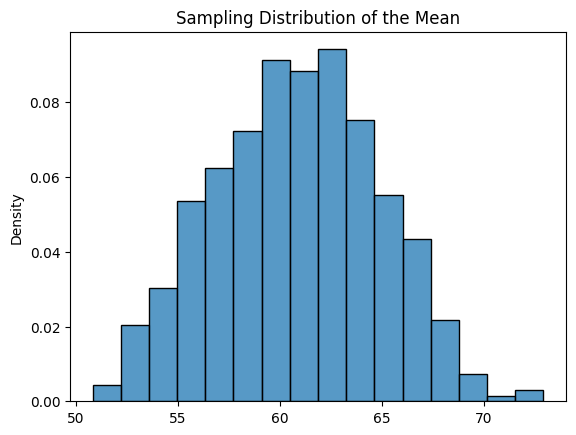

In [57]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_population = pd.read_csv('salmon_population.csv')
population = np.array(df_population.Salmon_Weight)
sample_size = 10
sample = np.random.choice(population, sample_size, replace=False)
print(sample)
print(np.mean(sample))

sample_size_2 = 100
sample_means = []
for _ in range(500):
    sample_2 = np.random.choice(population, sample_size_2, replace=False)
    sample_means += [np.mean(sample_2)]
print("min", min(sample_means))
print("max", max(sample_means))
print("avg", np.mean(sample_means))
print("std", np.std(sample_means))

sns.histplot(sample_means, stat='density')
plt.title("Sampling Distribution of the Mean")
plt.show()


## Central Limit Theorem (CLT)

The Central Limit Theorem (CLT) allows us to specifically describe the sampling distribution of 
the mean.

The CLT states that the sampling distribution of the mean is normally distributed as long as the 
population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is 
usually a good rule of thumb, regardless of what the distribution of the population is like. If 
the distribution of the population is normal, the sample size can be smaller than that.

The CLT not only establishes that the sampling distribution will be normally distributed, but it 
also allows us to describe that normal distribution quantitatively. Normal distributions are 
described by their mean $ \mu $ (mu) and standard deviation $ \sigma $ (sigma).

Let’s break this up:

We take samples of size n from a population (that has a true population mean $ \mu $ and standard 
deviation of $ \sigma $) and calculate the sample mean x. Given that n is sufficiently large (n > 
30), the sampling distribution of the means will be normally distributed with:
* mean x approximately equal to the population mean $ \mu $
* standard deviation equal to the population standard deviation divided by the square root of the sample size. 

We can write this out as:

<b> $ SamplingDistributionSTD = \frac{\sigma}{\sqrt{n}} $ 

The standard deviation of a sampling distribution is also known as the standard error of the 
estimate of the mean. 

